In [1]:
from __future__ import division

import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

water_1.txt

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [2]:
water = pd.read_csv('water_1.txt', delimiter='\t')
water.info()
water.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [3]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


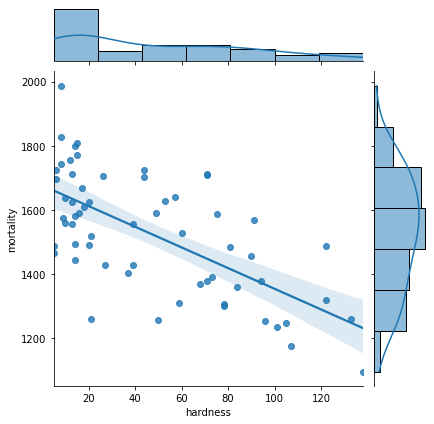

In [4]:
sns.jointplot('hardness', 'mortality', water, kind="reg");

In [5]:
print('Pearson correlation: %.4f' % stats.pearsonr(water.hardness, water.mortality)[0])

Pearson correlation: -0.6548


In [6]:
print('Spearman correlation: %.4f' % stats.spearmanr(water.hardness, water.mortality)[0])

Spearman correlation: -0.6317


Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [7]:
water_south = water[water.location == 'South']
water_north = water[water.location == 'North']
water_south.shape
water_north.shape

(26, 4)

(35, 4)

In [8]:
print('Pearson "South" correlation: %.4f' % stats.pearsonr(water_south.hardness, water_south.mortality)[0])
print('Pearson "North" correlation: %.4f' % stats.pearsonr(water_north.hardness, water_north.mortality)[0])

Pearson "South" correlation: -0.6022
Pearson "North" correlation: -0.3686


Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [9]:
bars_sex = np.array([[203., 239.], [718., 515.]])

In [10]:
def matthewsr(a, b, c, d):
    return (a*d - b*c) / np.sqrt((a + b)*(a + c)*(b + d)*(c + d))

In [11]:
matthews_coeff = matthewsr(*bars_sex.flatten())
print('Matthews correlation: %.4f' % matthews_coeff)

Matthews correlation: -0.1090


В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [13]:
bars_sex.shape
print('Matthews significance p-value: %f' % stats.chi2_contingency(bars_sex)[1])

(2, 2)

Matthews significance p-value: 0.000011


В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [14]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = sample1[0] / np.sum(sample1)
    p2 = sample2[0] / np.sum(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    
    return (left_boundary, right_boundary)

In [15]:
print('95%% confidence interval for a difference of men and women: [%.4f, %.4f]' %
      proportions_diff_confint_ind(bars_sex[:,1], bars_sex[:,0]))

95% confidence interval for a difference of men and women: [0.0539, 0.1392]


Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [17]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = np.sum(sample1)
    n2 = np.sum(sample2)
    
    p1 = sample1[0] / n1
    p2 = sample2[0] / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [18]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [19]:
print('p-value: %f' % proportions_diff_z_test(proportions_diff_z_stat_ind(bars_sex[:,1], bars_sex[:,0])))

p-value: 0.000008


Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

Не доволен \ Более или менее \ Доволен

Не очень счастлив 197 \ 111 \ 33

Достаточно счастлив 382 \ 685 \ 331

Очень счастлив 110 \ 342 \ 333

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [20]:
happiness = np.array( [[197., 111., 33. ],
                       [382., 685., 331.],
                       [110., 342., 333.]] )

In [21]:
stats.chi2_contingency(happiness)
print('Chi2 stat value: %.4f' % stats.chi2_contingency(happiness)[0])

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

Chi2 stat value: 293.6831


На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [22]:
print('Chi2 stat p-value: %.62f' % stats.chi2_contingency(happiness)[1])

Chi2 stat p-value: 0.00000000000000000000000000000000000000000000000000000000000002


Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

In [23]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [24]:
print('V Cramer stat value: %.4f' % cramers_stat(happiness))

V Cramer stat value: 0.2412
